In [1]:
%load_ext autoreload
%autoreload 2
from corr_study.datasetApi import *
from corr_study.correlation import *
from corr_study.voxels import *
from matplotlib import pyplot as plt

dataset = Dataset("corr_study/dataset/")

route = dataset.get_routes_TLC()[0]
# ids = dataset.get_ids_CV(Town.T1, Weather.Clear, Time.Sunset, Sensor.LT)

route = dataset.get_routes_TLC()[0]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [11]:
pcd_top = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_voxels(pcd_top_compare, 0.25, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_correlation.append(correla)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/filo/anaconda3/envs/pqos-correlation/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/filo/anaconda3/envs/pqos-correlation/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [22]:
lt = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, 1)
ll = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LFL, 1)
a = np.zeros(lt.data.shape[0], dtype=int) - 1
b = np.zeros(ll.data.shape[0], dtype=int) + 1
gt = np.concatenate((a,b))

SelmaPointCloud(np.concatenate((lt.data, ll.data*[-1,-1,1]), axis = 0), ground_truth=gt).visualize()

KeyboardInterrupt: 

In [10]:
pcd_top = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_cluster_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_cluster_correlation.append(correla)

KeyboardInterrupt: 

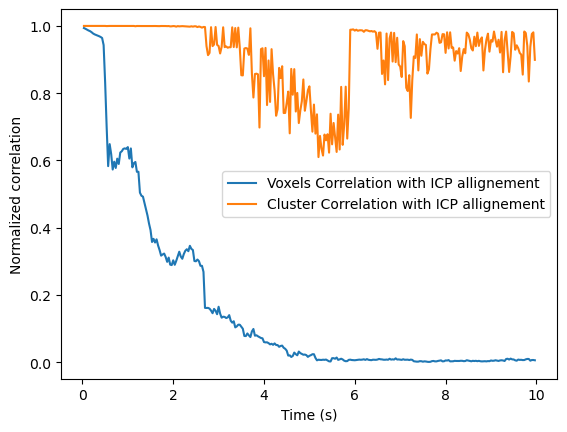

In [63]:
fig, ax = plt.subplots(1,1)
pp, = ax.plot(np.arange(1,300)/30, icp_correlation)
pc, = ax.plot(np.arange(1,300)/30, icp_cluster_correlation)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Normalized correlation")
ax.legend([pp, pc],["Voxels Correlation with ICP allignement", "Cluster Correlation with ICP allignement"])
plt.show()

In [59]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_cluster_mse = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation, return_mse=True)
    icp_cluster_mse.append(correla)

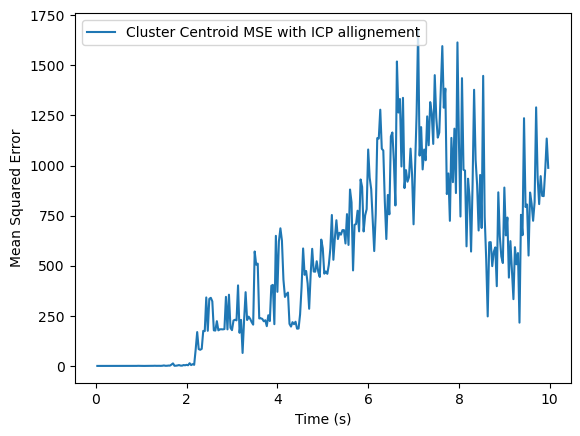

In [60]:
fig, ax = plt.subplots(1,1)
pmse, = ax.plot(np.arange(1,300)/30, icp_cluster_mse)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Mean Squared Error")
ax.legend([pmse],["Cluster Centroid MSE with ICP allignement"])
plt.show()

In [50]:

pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 120)
correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 30, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=None)

In [5]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
center_mass_corr = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    center_mass_corr.append(pcd_top.compare_using_voxels(pcd_top_compare, 0.5))

In [7]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
v_top = pcd_top.voxelize(0.5)
corr = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    corr.append(v_top.compute_correlation(pcd_top_compare.voxelize(0.5, v_top.boundaries)))


In [8]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
v_top = pcd_top.voxelize(0.5)
cross_corr = []
for i in range(1, 101, 1):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    cross_corr.append(v_top.compute_correlation_inferring_offset(pcd_top_compare.voxelize(0.5, v_top.boundaries)))

In [9]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
center_mass_corr_weighted = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    center_mass_corr_weighted.append(pcd_top.compare_using_voxels(pcd_top_compare, 0.5, weighted=True))

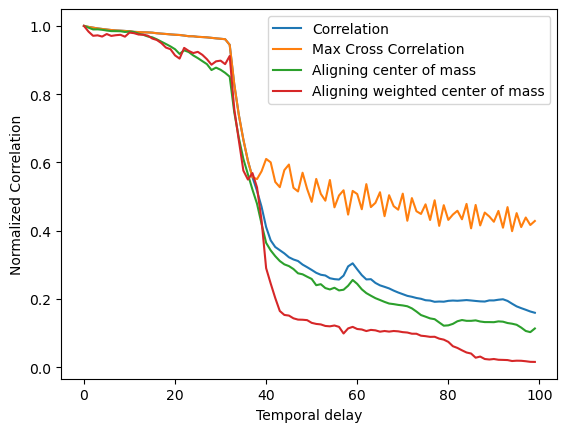

In [10]:
fig, ax = plt.subplots(1,1)
c, = ax.plot(corr)
cc, = ax.plot(cross_corr)
cm, = ax.plot(center_mass_corr)
cmw, = ax.plot(center_mass_corr_weighted)
ax.legend([c, cc, cm, cmw], ["Correlation", "Max Cross Correlation", "Aligning center of mass", "Aligning weighted center of mass"])
plt.ylabel("Normalized Correlation")
plt.xlabel("Temporal delay")
plt.show()

In [30]:
dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 32).visualize()
dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 35).visualize()

In [3]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
mse_mass_center = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    mse_mass_center.append(pcd_top.compare_using_clusters(pcd_top_compare, 10))


In [4]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
mse_mass_center_w = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    mse_mass_center_w.append(pcd_top.compare_using_clusters(pcd_top_compare, 10, weighted=True))


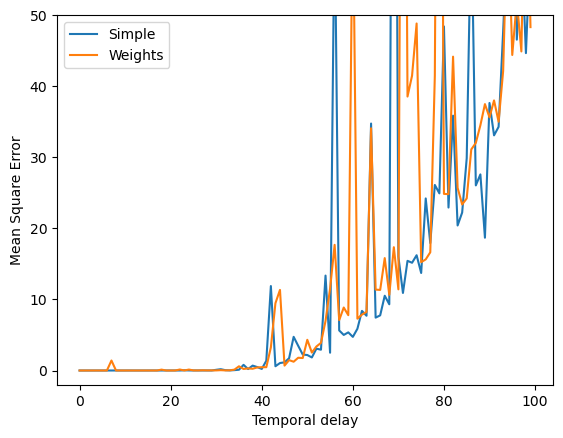

In [5]:
fig, ax = plt.subplots(1,1)
s, = ax.plot(mse_mass_center)
w, = ax.plot(mse_mass_center_w)
ax.legend([s, w], ["Simple", "Weights"])
plt.ylabel("Mean Square Error")
plt.xlabel("Temporal delay")
ax.set_ylim([-2,50])
plt.show()

In [13]:
def compute_oddly_normalized_distance(points):
    dists_matrix = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=-1))
    distances = np.sqrt(np.sum(points ** 2, axis=1))
    distances = distances[:, np.newaxis]* distances
    return dists_matrix/distances

clustering = DBSCAN(eps=0.001, min_samples=10, metric="precomputed").fit(compute_oddly_normalized_distance(pcd_top.data[15000:30000,:]))
clusters = SelmaPointCloud(pcd_top.data[15000:30000,:], clustering.labels_)
clusters.visualize()

In [65]:
pcd_1 = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
pcd_2 = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 2)
a = np.zeros(pcd_1.data.shape[0], dtype=int) - 1
b = np.zeros(pcd_2.data.shape[0], dtype=int) + 1
gt = np.concatenate((a,b))

SelmaPointCloud(np.concatenate((pcd_1.data, pcd_2.data), axis = 0), ground_truth=gt).visualize()

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Handle non valido. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L'operazione di trasformazione richiesta non è supportata. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L'operazione di trasformazione richiesta non è supportata. 


In [96]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
target = []
for i in range(1, 11):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    target.append(pcd_top_compare.data)
mse = pcd_top.compare_using_dbscan(target, 0.05, 100)
print(mse)

100%|██████████| 43/43 [00:32<00:00,  1.33it/s]
c:\Users\Filippo\Desktop\uni\thesis\pqos-correlation\corr_study\selmaPointCloud.py:202: RuntimeWarning: Mean of empty slice.
  centroid_second = data_second[labels_second == i].mean(axis=0)
 36%|███▌      | 15/42 [00:07<00:08,  3.09it/s]c:\Users\Filippo\Desktop\uni\thesis\pqos-correlation\corr_study\selmaPointCloud.py:183: RuntimeWarning: Mean of empty slice.
  #     centroid_first = first_pointcloud[labels_first == i].mean(axis=0)
100%|██████████| 32/32 [00:13<00:00,  2.37it/s]

[0.06319631789131108, 0.049311042558667174, 0.016931637428582925, 0.01743789419418201, 0.010877727385090167, 0.013613972508210883, 0.012093654171819205, 0.012134498149744159, 0.012158936521786144, 0.011885721548165319]


In [3]:
fp = "/home/filo/thesis/pqos-correlation/corr_study/dataset/TLC_web/archives/t3low/ClearSunset/BBOX.hdf5"
import h5py
import numpy as np
from pathlib import Path

filepath = Path(fp)
loc = None
rot = None
with h5py.File(filepath,'r') as f:
    root_grp = f.get("BBOX")
    ids = list(root_grp.keys())
    ego = root_grp.get("0194")
    loc = np.array(ego.get('location'))
    rot = np.array(ego.get('rotation'))
print(rot.min())

-179.9951


In [1]:
import open3d as o3d
import seaborn as sns

def create_homogeneous_matrix(x, y, z, pitch, yaw, roll):
    # Convert pitch, yaw, and roll angles to radians
    pitch = np.radians(pitch)
    yaw = np.radians(yaw)
    roll = np.radians(roll)

    # Create rotation matrices for each angle
    Rx = np.array([[1, 0, 0], [0, np.cos(pitch), -np.sin(pitch)], [0, np.sin(pitch), np.cos(pitch)]])
    Ry = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]])
    Rz = np.array([[np.cos(roll), -np.sin(roll), 0], [np.sin(roll), np.cos(roll), 0], [0, 0, 1]])

    # Combine the rotation matrices
    R = np.dot(Rz, np.dot(Ry, Rx))

    # Create the translation vector
    t = np.array([[x], [y], [z]])

    # Combine the rotation matrix and translation vector into a homogeneous matrix
    T = np.hstack((R, t))
    T = np.vstack((T, np.array([0, 0, 0, 1])))

    return T
freq =25
samples = int(np.floor(3325/freq))-3
pointclouds = []
for i in range(samples):
    m = create_homogeneous_matrix(-loc[i*freq,1], -loc[i*freq,0], -loc[i*freq,2], 180-rot[i*freq,0], 180-rot[i*freq,2], 180-rot[i*freq,1])
    lt = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i*freq+1)
    pc = o3d.geometry.PointCloud()
    pc.points = o3d.utility.Vector3dVector(lt.data)
    palette = sns.color_palette("hls", n_colors=36)
    get_color = lambda tag:palette[tag%36] if tag != -1 else (1.0,1.0,1.0)
    colors = np.array(np.vectorize(get_color)(lt.ground_truth[:,0])).T
    pc.colors = o3d.utility.Vector3dVector(colors)
    pc.transform(m)
    pointclouds.append(pc)

o3d.visualization.draw_geometries(pointclouds)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


NameError: name 'np' is not defined

In [8]:
from corr_study.truthsetter import *
fp = "/home/filo/thesis/pqos-correlation/corr_study/dataset/TLC_web/archives/t3low/ClearSunset/BBOX.hdf5"
find_truth(fp, 1, 100, dataset, "t3low",  Weather.Clear, Time.Sunset, Sensor.LT)

(90878, 3)
(90878, 3)
(90878, 2)
0 [0. 0. 0.]
(90878, 3)
(90878, 2)
146 [0. 0. 0.]
(90878, 3)
(90878, 2)
147 [0. 0. 0.]
(90878, 3)
(90878, 2)
149 [0. 0. 0.]
(90878, 3)
(90878, 2)
151 [0. 0. 0.]
(90878, 3)
(90878, 2)
194 [0. 0. 0.]
(90878, 3)
(90878, 2)
218 [0. 0. 0.]
(90878, 3)
(90878, 2)
258 [0. 0. 0.]
(90878, 3)
(90878, 2)
334 [0. 0. 0.]
(90878, 3)
(90878, 2)
337 [0. 0. 0.]
(90878, 3)
(90878, 2)
343 [0. 0. 0.]
(90878, 3)
(90878, 2)
419 [0. 0. 0.]
(90878, 3)
(90878, 2)
421 [0. 0. 0.]
(90878, 3)
(90878, 2)
424 [0. 0. 0.]
(90878, 3)
(90878, 2)
427 [0. 0. 0.]
(90878, 3)
(90878, 2)
458 [0. 0. 0.]
(90878, 3)
(90878, 2)
506 [0. 0. 0.]
(90878, 3)
(90878, 2)
508 [0. 0. 0.]
(90878, 3)
(90878, 2)
563 [0. 0. 0.]
(90878, 3)
(90878, 2)
637 [0. 0. 0.]
(90878, 3)
(90878, 2)
667 [0. 0. 0.]
(90878, 3)
(90878, 2)
673 [0. 0. 0.]
(90878, 3)
(90878, 2)
0 [ 9.58334003e-04 -2.83389823e-03  6.60111478e-05]
(90878, 3)
(90878, 2)
146 [8.33902013e-05 8.38482653e-05 4.77779512e-06]
(90878, 3)
(90878, 2)
147 [ 3.